In [1]:
#!/usr/bin/env python
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pprint
import json

from matplotlib.colors import from_levels_and_colors
from matplotlib.collections import LineCollection

#%matplotlib notebook
%matplotlib inline
plt.rcParams["figure.figsize"]= (15,15)

### Loading data:


In [15]:
# Folders:
root = 'train_test_mixed'
train_folder = f'{root}/train/'
test_folder = f'{root}/test/'
mixed_folder = f'{root}/mixed/'

earthquake_samples = 'earthquake_sample_events.h5'
explosion_samples = 'explosion_sample_events.h5'

In [16]:
# Mixed, train, test sets:
mixed_info = np.load(mixed_folder + 'mixed_info.npy', allow_pickle=True)
mixed_trace = np.load(mixed_folder + 'mixed_trace.npy', allow_pickle=True)

train_info = np.load(train_folder + 'train_info.npy', allow_pickle=True)
train_trace = np.load(train_folder + 'train_trace.npy', allow_pickle=True)

test_info = np.load(test_folder + 'test_info.npy', allow_pickle=True)
test_trace = np.load(test_folder + 'test_trace.npy', allow_pickle=True)

In [17]:
def load_datasets(dataset):
    with h5py.File(dataset, 'r') as fin:
        event_info_dataset = fin.get('event_info')
        trace_dataset = fin.get('traces')

        # Convert to numpy arrays
        event_info = np.array(event_info_dataset)
        trace_data = np.array(trace_dataset)
    event_type = dataset.split('_')[0]

    print(f'Loaded {event_info.shape[0]} {event_type} events')
    return event_info, trace_data

In [18]:
earthquake_info, earthquake_trace = load_datasets(earthquake_samples)
explosion_info, explosion_trace = load_datasets(explosion_samples)

Loaded 152 earthquake events
Loaded 198 explosion events


## Drawing Scandinavia

In [7]:
m = Basemap(projection="stere", 
            width=1800000,
            height=2000000,
            lat_ts=63,
            lat_0=63,
            lon_0=15,
            resolution = 'h')

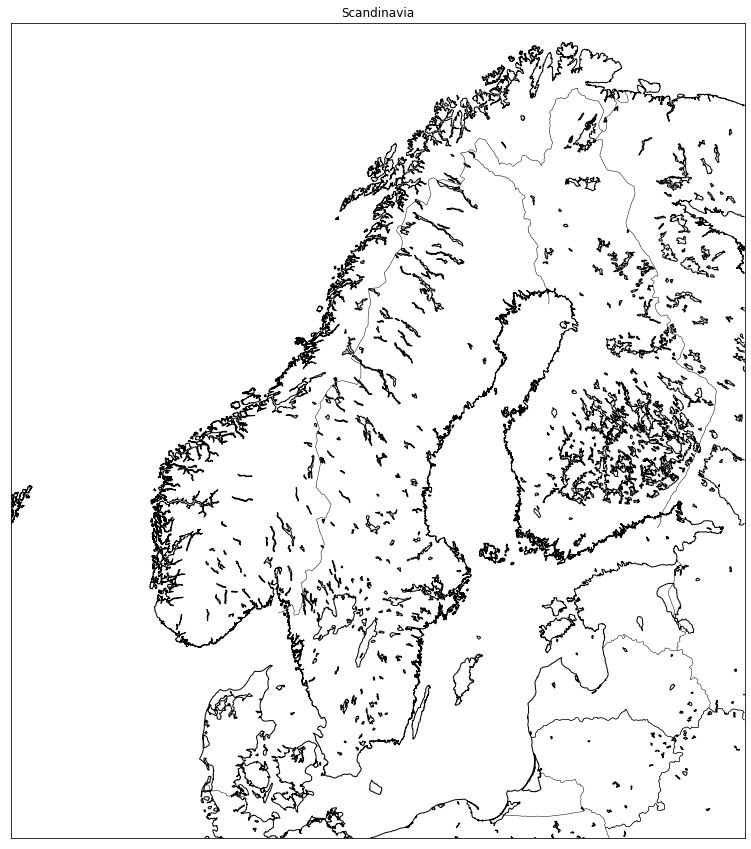

In [8]:
m.drawcoastlines()
m.drawcountries()
#m.drawrivers()
#m.fillcontinents()
#m.etopo()
#m.bluemarble()
#m.drawmapboundary(fill_color='aqua')
plt.title('Scandinavia')
plt.show()

### Drawing ACRES events

In [19]:
def get_coords(info):
    info = json.loads(info)
    lat = info['origins'][0]['latitude']
    lon = info['origins'][0]['longitude']
    mag = info['magnitudes'][0]['mag']
    event_type = info['event_type']
    return lat, lon, mag, event_type

In [20]:
def lons_lats_mags_labels(info):
    lons = []
    lats = []
    mags = []
    labels = []


    for i in info:
        lats.append(get_coords(i)[0])
        lons.append(get_coords(i)[1])
        mags.append(get_coords(i)[2])
        labels.append(get_coords(i)[3])
    return lons, lats, mags, labels
    
    

In [21]:
lons_earth, lats_earth, earth_mags = lons_lats_mags_labels(earthquake_info)[0:3]
lons_explo, lats_explo, explo_mags = lons_lats_mags_labels(explosion_info)[0:3]

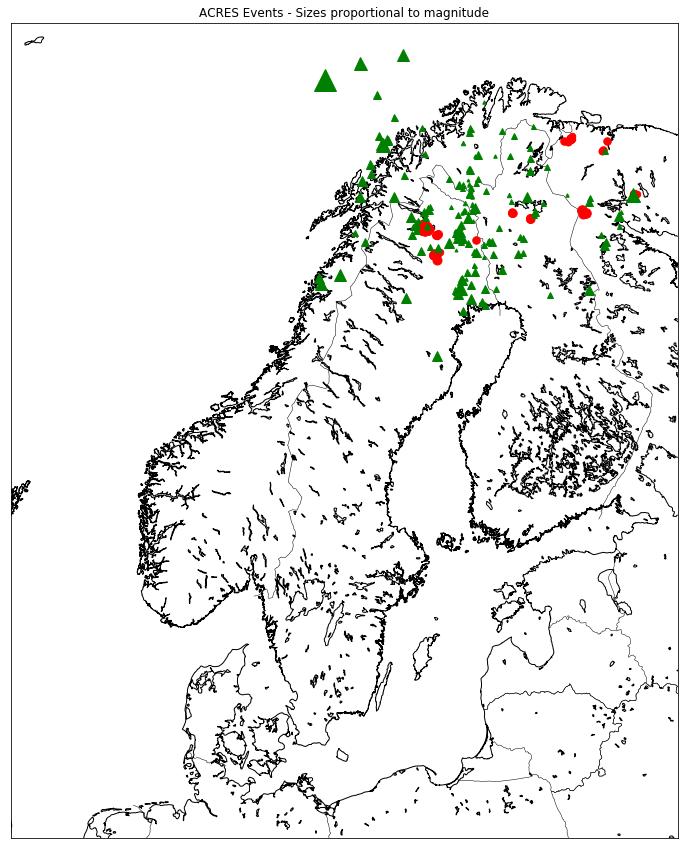

In [25]:
c = Basemap(projection="stere", 
            width=1.8E6,
            height=2.2E6,
            lat_ts=63,
            lat_0=63,
            lon_0=15,
            resolution = 'h')

x_explo, y_explo = c(lons_explo, lats_explo)
x_earth, y_earth = c(lons_earth, lats_earth)

c.drawcoastlines()
c.drawcountries()

for x1, y1, s in zip(x_explo,y_explo, explo_mags):
    c.plot(x1, y1, 'ro', markersize = s*5, color='r', label = 'Explosion')

for x1, y1, s in zip(x_earth,y_earth, earth_mags):
    c.plot(x1, y1, 'c^', markersize = s*5, color = 'g', label = 'Earthquake')
    
plt.title('ACRES Events - Sizes proportional to magnitude')
plt.show()

In [23]:
single_eq = earthquake_info[5]

In [24]:
pprint.pprint(json.loads(single_eq))

{'az_to_arces': 60.19398478311701,
 'az_to_spits': 350.8628058806293,
 'baz_to_arces': 242.05786542403908,
 'baz_to_spits': 163.98143260400036,
 'comments': [{'creation_info': {'author': 'general'},
               'resource_id': 'smi:local/a66eda64-3360-47a6-92a3-ac0cdb966c87',
               'text': 'PROBABLY EARTHQUAKE, NORTHERN NORWAY'}],
 'dist_to_arces': 89.62048156956376,
 'dist_to_spits': 1031.5065792048529,
 'event_type': 'earthquake',
 'event_type_certainty': 'known',
 'magnitudes': [{'creation_info': {'agency_id': 'HEL'},
                 'mag': 1.3,
                 'mag_errors': {'uncertainty': 0.1},
                 'magnitude_type': 'ML',
                 'origin_id': 'smi:local/d2361110-6f50-43c6-8f2c-528cb6c0c6f2',
                 'resource_id': 'smi:local/2200b25c-f7d2-4dd3-8c6e-2e571e45e1ed',
                 'station_count': 14}],
 'origins': [{'creation_info': {'agency_id': 'HEL'},
              'depth': 24.0,
              'latitude': 69.142,
              'latitu